In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
import pickle
from warnings import simplefilter
warnings.filterwarnings('ignore')
simplefilter(action='ignore', category = FutureWarning)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
dataset = pd.read_csv('../static/data/heart.csv')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


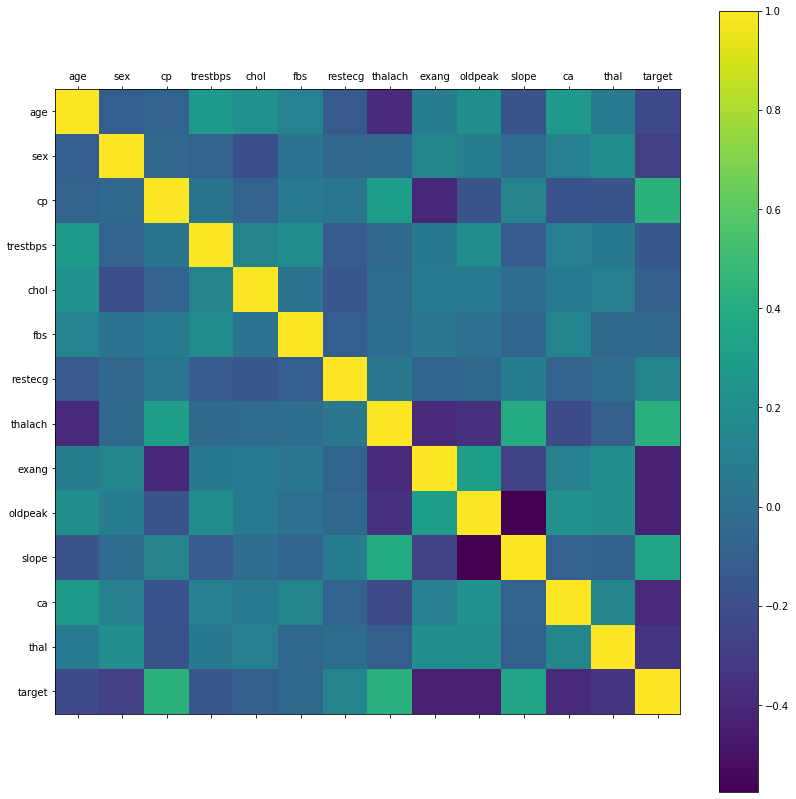

In [6]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

In [7]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
encoded = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'],drop_first=True)

In [9]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
encoded[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])


In [10]:
encoded.head(5)

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [11]:
y = encoded['target']
X = encoded.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [12]:
X_train.shape

(686, 22)

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Training the model to find out best K neighbor value
#knn_scores = []
#for k in range(1,21):
#    knn_classifier = KNeighborsClassifier(n_neighbors = k)
#    knn_classifier.fit(X_train, y_train)
#    knn_scores.append(knn_classifier.score(X_test, y_test))

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

In [16]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [17]:
print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.8615160349854227
Accuracy for test set for Logistic Regression = 0.8938053097345132


In [18]:
# save the model to disk
filename = 'logistic_trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))